<a href="https://colab.research.google.com/github/Devanshu0502/Credit-Card-Fraud-Detection/blob/main/Automated_Hyperparameter_Tuning_Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Projects/Credit Card/creditcard.csv')

In [2]:
X = df[['V17', 'V9', 'V6', 'V12']]
Y = df['Class']

In [3]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30,random_state = 101)

In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc1 = accuracy_score(Y_Test,predictionforest)

[[85289    10]
 [   34   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.76      0.83       144

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [5]:
model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc2 = accuracy_score(Y_Test,predictionforest)

[[85288    11]
 [   41   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.90      0.72      0.80       144

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [6]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

<Axes: xlabel='param_criterion', ylabel='param_n_estimators'>

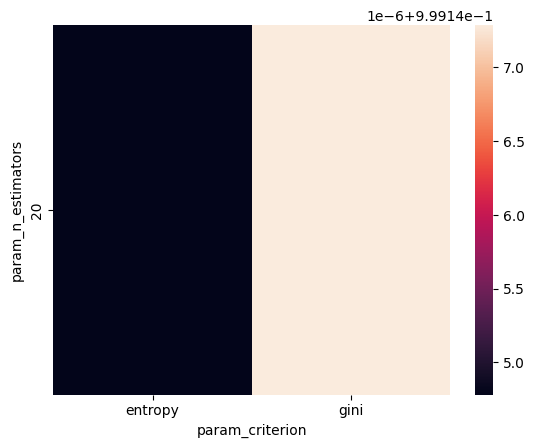

In [7]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [8]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc3 = accuracy_score(Y_Test,predictionforest)

[[85279    20]
 [   40   104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.84      0.72      0.78       144

    accuracy                           1.00     85443
   macro avg       0.92      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [9]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc4 = accuracy_score(Y_Test,predictionforest)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[[85277    22]
 [   47    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.82      0.67      0.74       144

    accuracy                           1.00     85443
   macro avg       0.91      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [10]:
pip install deap update_checker tqdm stopit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': [10]}
               
tpot_classifier = TPOTClassifier(generations= 4, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_Train,Y_Train) 

Optimization Progress:   0%|          | 0/72 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9992225276378885

Generation 2 - Current best internal CV score: 0.9992225276378885

Generation 3 - Current best internal CV score: 0.9992225276378885

Generation 4 - Current best internal CV score: 0.9992325595393351

Best pipeline: RandomForestClassifier(RandomForestClassifier(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10), criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [2],
                                                                        'max_features': ['auto'],
                                                                        'min_samples_leaf': [4,
                                                                                             12],
                                                                        'min_samples_split': [5,
                                                                                              10],
                                                                        'n_estimators': [10]}},
               cv=4, early_stop=12, generations=4, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [13]:
accuracy = tpot_classifier.score(X_Test, Y_Test)
print(accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


0.9993328885923949


# ANN Tuning (Artificial Neural Network)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [15]:
def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 4, activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

In [16]:
# Defining grid parameters
activation = ['softmax', 'relu']
neurons = [5, 10]
optimizer = ['Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 2)

<ipython-input-16-bf021f366bc5>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 2)


In [17]:
model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(X_Train,Y_Train)

Epoch 1/5
195/195 - 1s - loss: 0.3304 - accuracy: 0.9690 - 1s/epoch - 6ms/step
Epoch 2/5
195/195 - 0s - loss: 0.0549 - accuracy: 0.9983 - 337ms/epoch - 2ms/step
Epoch 3/5
195/195 - 0s - loss: 0.0253 - accuracy: 0.9983 - 365ms/epoch - 2ms/step
Epoch 4/5
195/195 - 0s - loss: 0.0178 - accuracy: 0.9983 - 342ms/epoch - 2ms/step
Epoch 5/5
195/195 - 0s - loss: 0.0149 - accuracy: 0.9983 - 329ms/epoch - 2ms/step


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1286fd6790>,
             n_jobs=-1,
             param_grid={'activation': ['softmax', 'relu'], 'neurons': [5, 10],
                         'optimizer': ['Adam', 'Adamax']})

In [18]:
print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

Max Accuracy Registred: 0.998 using {'activation': 'relu', 'neurons': 10, 'optimizer': 'Adam'}


In [19]:
prediction_test = model.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_test))
print(classification_report(Y_Test,prediction_test))
accuracy_ANN = accuracy_score(Y_Test,prediction_test)

2671/2671 [==============================] - 4s 1ms/step
[[85299     0]
 [  144     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target
    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
         svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
         classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    ...
    return accuracy


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-04-25 09:25:10,947] A new study created in memory with name: no-name-bc71fdd9-57bb-4ff2-8e23-df333d57bb0e
<ipython-input-21-0afde9f93c7e>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
[I 2023-04-25 09:25:10,953] Trial 0 finished with value: 0.9993328885923949 and parameters: {'classifier': 'SVC', 'svc_c': 165.8143738972841}. Best is trial 0 with value: 0.9993328885923949.
[I 2023-04-25 09:25:10,957] Trial 1 finished with value: 0.9993328885923949 and parameters: {'classifier': 'SVC', 'svc_c': 0.1721101771331414}. Best is trial 0 with value: 0.9993328885923949.
[I 2023-04-25 09:25:10,961] Trial 2 finished with value: 0.9993328885923949 and parameters: {'classifier': 'SVC', 'svc_c': 2.952200640025481}. Best is trial 0 with value: 0.9993328885923949.
<

In [22]:
!pip install parameter-sherpa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

In [24]:
parameters = [sherpa.Discrete('n_estimators', [2, 50]),
              sherpa.Choice('criterion', ['gini', 'entropy']),
              sherpa.Continuous('max_features', [0.1, 0.9])]

algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [25]:
X, y = load_breast_cancer(return_X_y=True)
study = sherpa.Study(parameters=parameters,
                     algorithm=algorithm,
                     lower_is_better=False)

for trial in study:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    clf = RandomForestClassifier(criterion=trial.parameters['criterion'],
                                 max_features=trial.parameters['max_features'],
                                 n_estimators=trial.parameters['n_estimators'],
                                 random_state=0)
    scores = cross_val_score(clf, X, y, cv=5)
    print("Score: ", scores.mean())
    study.add_observation(trial, iteration=1, objective=scores.mean())
    study.finalize(trial)
print(study.get_best_result())

 * Serving Flask app 'sherpa.app.app'
 * Debug mode: on
Trial  1  with parameters  {'n_estimators': 24, 'criterion': 'entropy', 'max_features': 0.7623811676884378}
Score:  0.956078248719143
Trial  2  with parameters  {'n_estimators': 41, 'criterion': 'entropy', 'max_features': 0.24492264352451176}
Score:  0.9648657040832168
Trial  3  with parameters  {'n_estimators': 5, 'criterion': 'gini', 'max_features': 0.7484842868916249}
Score:  0.9438130725042695
Trial  4  with parameters  {'n_estimators': 42, 'criterion': 'gini', 'max_features': 0.24865670614722815}


Score:  0.9595870206489675
Trial  5  with parameters  {'n_estimators': 41, 'criterion': 'entropy', 'max_features': 0.24536873955220867}


Score:  0.9648657040832168
Trial  6  with parameters  {'n_estimators': 38, 'criterion': 'entropy', 'max_features': 0.22988409470496762}


Score:  0.968390001552554
Trial  7  with parameters  {'n_estimators': 38, 'criterion': 'entropy', 'max_features': 0.8521297263487614}


Score:  0.9543549138332559
Trial  8  with parameters  {'n_estimators': 41, 'criterion': 'entropy', 'max_features': 0.21578355650313252}


Score:  0.968390001552554
Trial  9  with parameters  {'n_estimators': 41, 'criterion': 'entropy', 'max_features': 0.1}


Score:  0.9701133364384413
Trial  10  with parameters  {'n_estimators': 48, 'criterion': 'entropy', 'max_features': 0.1}
Score:  0.9701133364384413
{'Trial-ID': 9, 'Iteration': 1, 'criterion': 'entropy', 'max_features': 0.1, 'n_estimators': 41, 'Objective': 0.9701133364384413}
